In [5]:
'''
문제1 ] 서울 지역(구)의 경도와 위도 정보를 사용하여, 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류 분석을 수행합니다.

[데이터 셋 정보 ]
district: 행정구역 (서초구, 송파구, 용산구 등, 서울의 단위 지역 분류입니다)
dong: 구(district)보다 작은 행정구역 (대치동, 도곡동, 암사동 등, 서울의 소단위 분류입니다)
longitude: 경도
latitude: 위도
label: 한강 기준으로 동,서,남,북으로 구분한 지역 명칭
district_dict_list = [
{'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
{'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
{'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
{'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
{'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},

{'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
{'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
{'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
{'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
{'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},

{'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
{'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
{'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
{'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
{'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},

{'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
{'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
{'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
{'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
{'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
]
[분석 수행에 포함될 내용]
A. 특성 (위도 경도) 과 클래스 (동,서,남,북으로 구분한 지역 명칭)를 분리
B. train과 test 데이터 분리
C. 의사결정트리 분류 분석 수행
D. 의사결정트리 시각화 
E. 모델 예측 정확도(accuracy)를 확인
'''


"\n문제1 ] 서울 지역(구)의 경도와 위도 정보를 사용하여, 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류 분석을 수행합니다.\n\n[데이터 셋 정보 ]\ndistrict: 행정구역 (서초구, 송파구, 용산구 등, 서울의 단위 지역 분류입니다)\ndong: 구(district)보다 작은 행정구역 (대치동, 도곡동, 암사동 등, 서울의 소단위 분류입니다)\nlongitude: 경도\nlatitude: 위도\nlabel: 한강 기준으로 동,서,남,북으로 구분한 지역 명칭\ndistrict_dict_list = [\n{'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},\n{'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},\n{'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},\n{'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},\n{'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},\n\n{'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},\n{'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},\n{'district': 'Seocho-gu', 'latitude': 37.4

In [6]:
import numpy as np
import pandas as pd


district_dict_list = [
{'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
{'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
{'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
{'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
{'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},

{'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
{'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
{'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
{'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
{'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},

{'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
{'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
{'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
{'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
{'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},

{'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
{'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
{'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
{'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
{'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
]

# A. 특성 (위도 경도) 과 클래스 (동,서,남,북으로 구분한 지역 명칭)를 분리
df = pd.DataFrame(district_dict_list)
df = df[['district', 'latitude', 'longitude', 'label']]

print(df.head())
print(df.tail())

location = df[['latitude','longitude']] #location = 행정구와 위치좌표
label = df['label']                                #label = 분류된 클래스 

print(location.head()) 
print(label.head())

       district   latitude   longitude    label
0    Gangseo-gu  37.551000  126.849500  Gangseo
1  Yangcheon-gu  37.524240  126.855396  Gangseo
2       Guro-gu  37.495400  126.887400  Gangseo
3  Geumcheon-gu  37.451900  126.902000  Gangseo
4       Mapo-gu  37.560229  126.908728  Gangseo
         district   latitude   longitude     label
15   Seongdong-gu  37.557340  127.041667  Gangdong
16  Dongdaemun-gu  37.575759  127.025288  Gangdong
17    Gwangjin-gu  37.557562  127.083467  Gangdong
18    Gangdong-gu  37.554194  127.151405  Gangdong
19    Jungrang-gu  37.593684  127.090384  Gangdong
    latitude   longitude
0  37.551000  126.849500
1  37.524240  126.855396
2  37.495400  126.887400
3  37.451900  126.902000
4  37.560229  126.908728
0    Gangseo
1    Gangseo
2    Gangseo
3    Gangseo
4    Gangseo
Name: label, dtype: object


In [7]:
# 데이터 분리전 전처리 
from sklearn.preprocessing import LabelEncoder

location["latitude"] = LabelEncoder().fit_transform(location["latitude"])
location["longitude"] = LabelEncoder().fit_transform(location["longitude"])
print(location.head())
print(location.tail())

   latitude  longitude
0         9          0
1         7          1
2         3          2
3         0          3
4        13          4
    latitude  longitude
15        11         11
16        15          9
17        12         16
18        10         19
19        16         17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
# B. train과 test 데이터 분리
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import io
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree 

# 20여개의 데이터를 각각 train:test = 3:1 의 비율로 나눔 
X_train, X_test, y_train, y_test = train_test_split(location, label, test_size=0.25, random_state=777)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

15
5
15
5


In [0]:
# C. 의사결정트리 분류 분석 수행
'''
model = DecisionTreeClassifier(criterion='entropy',  #불순물 감소 규칙 사용 
                               max_depth=5, 
                               min_samples_leaf=5).fit(X_train, y_train)
'''
# ※ 결과가 안 좋아서 단순화 
model = DecisionTreeClassifier(random_state=70).fit(X_train, y_train)


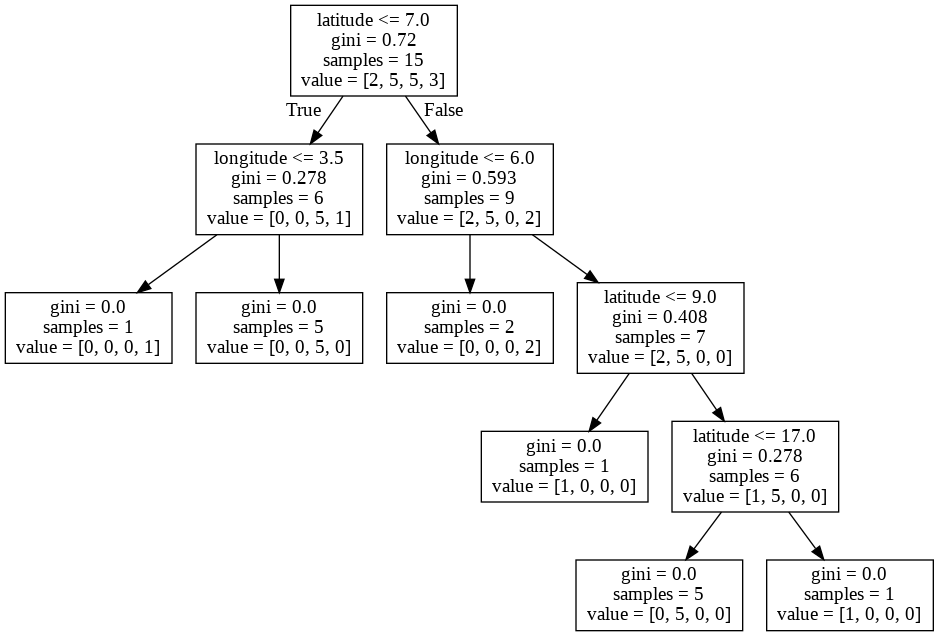

In [10]:
# D. 의사결정트리 시각화 
command_buf = io.StringIO() #문자열 입출력 관하여 선언 (메모리 처리속도상)
tree.export_graphviz(model, out_file=command_buf, feature_names=['latitude','longitude'])

graph = pydotplus.graph_from_dot_data(command_buf.getvalue())
image = graph.create_png()
Image(image)

In [11]:
# E. 모델 예측 정확도(accuracy)를 확인
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


print(confusion_matrix(y_train, model.predict(X_train)))

print(confusion_matrix(y_test, model.predict(X_test)))

print(classification_report(y_train, model.predict(X_train)))

print(classification_report(y_test, model.predict(X_test)))


[[2 0 0 0]
 [0 5 0 0]
 [0 0 5 0]
 [0 0 0 3]]
[[1 2 0]
 [0 0 0]
 [0 0 2]]
              precision    recall  f1-score   support

     Gangbuk       1.00      1.00      1.00         2
    Gangdong       1.00      1.00      1.00         5
     Gangnam       1.00      1.00      1.00         5
     Gangseo       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

              precision    recall  f1-score   support

     Gangbuk       1.00      0.33      0.50         3
    Gangdong       0.00      0.00      0.00         0
     Gangseo       1.00      1.00      1.00         2

    accuracy                           0.60         5
   macro avg       0.67      0.44      0.50         5
weighted avg       1.00      0.60      0.70         5



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----

In [0]:
'''
문제 2]
사이킷런의 손글씨 데이터를 로드하여 10번의 교차검증을 수행하여
RandomForest 분류분석과 DecisionTree분류분석의 교차 검증 평균 정확도를 비교할 수 있도록 라인 차트로 시각화하시오

A. 사이킷런의 손글씨 데이터를 로드
B. 교차 검증을 10번 수행하여, 10번의 교차 검증 평균 정확도 반환하는 함수를 정의하시오 
def cross_validation(classifier,features, labels):

C. 교차 검증 평균 정확도를 반환하는 함수에 각각 RandomForest 분류모델객체, DecisionTree분류 모델 객체를 전달하여 실행시킨 결과를 변수에 저장
D. 랜덤포레스트와 의사결정트리의 정확도를 비교해주는 라인 차트 출력
'''

In [12]:
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# A. 사이킷런의 손글씨 데이터를 로드

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape)
print(mnist.target.shape) 


(70000, 784)
(70000,)


In [13]:
# 정규화 및 train, test 분리 

X = mnist.data
y = mnist.target


# 정규화 
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

#train, test dataset 분리(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)
print('train data 개수:', X_train.shape)
print('test data 개수:', X_test.shape)

train data 개수: (49000, 784)
test data 개수: (21000, 784)


In [0]:
# B. 교차 검증을 10번 수행하여, 10번의 교차 검증 평균 정확도 반환하는 함수를 정의하시오 

def cross_validation( classifier, features, labels):
    scores = cross_val_score(classifier, features, labels, cv=10)
    return scores, scores.mean()

In [15]:
# C. 교차 검증 평균 정확도를 반환하는 함수에 각각 RandomForest 분류모델객체, DecisionTree분류 모델 객체를 전달하여 실행시킨 결과를 변수에 저장
DF_model_score, DF_model_mean = cross_validation(DecisionTreeClassifier(), X, y) 
RF_model_score, RF_model_mean = cross_validation(RandomForestClassifier(), X, y)

print(DF_model_score)
print(RF_model_score)

[0.87757143 0.87042857 0.86771429 0.87471429 0.86914286 0.86557143
 0.87557143 0.88085714 0.87471429 0.88871429]
[0.97328571 0.96614286 0.967      0.96771429 0.96542857 0.96928571
 0.96342857 0.97       0.971      0.97614286]


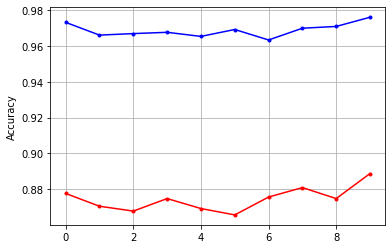

In [16]:
# D. 랜덤포레스트와 의사결정트리의 정확도를 비교해주는 라인 차트 출력
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(DF_model_score, marker='.', c="red", label='RF')
plt.plot(RF_model_score, marker='.', c="blue", label='DT')
plt.grid()
plt.ylabel('Accuracy')
plt.show() 

In [18]:
# decision tree 로 학습 
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(X_train, y_train)

y_hat = tree_model.predict(X_test)

#모델 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

tree_matrix = confusion_matrix(y_test, y_hat)
print(tree_matrix)

tree_report = classification_report(y_test, y_hat)
print(tree_report)

[[1778    1   66   15    3   49   60   61   33   46]
 [   0 2154   36   50    0   11    3    9   12    9]
 [ 112   52 1526   32   31   87  100   34   98   45]
 [  29   90  210 1231    8  297   12   16  141  126]
 [  87   22   50   36  942   23  108   21  147  602]
 [  60   78   91  262   36  844   83   23  140  264]
 [  68   23  186   16   36   60 1462   27  101   30]
 [  21   88   84   11   55   18    5 1765   61  145]
 [  52  178   76  151    4  235   51    3 1241   66]
 [  69   70   64   47   41   27   28   77  153 1513]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2112
           1       0.78      0.94      0.85      2284
           2       0.64      0.72      0.68      2117
           3       0.67      0.57      0.61      2160
           4       0.81      0.46      0.59      2038
           5       0.51      0.45      0.48      1881
           6       0.76      0.73      0.75      2009
           7       0.87      0.78   

In [19]:
# randomforest로 학습 
rf_model_= RandomForestClassifier(criterion="entropy",
                                  n_estimators=20, 
                                  max_depth=5, 
                                  class_weight="balanced")
rf_model_.fit(X_train, y_train)

y_hat_rf = rf_model_.predict(X_test)

#모델 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf_matrix = confusion_matrix(y_test, y_hat_rf)
print(rf_matrix)

rf_report = classification_report(y_test, y_hat_rf)
print(rf_report)

[[2017    1   11    4    1    8   22   10   36    2]
 [   0 2232    4    9    1    8    9   10    6    5]
 [  44  109 1703   28   16    9   82   50   65   11]
 [  33   75   73 1717   10   80   12   40   55   65]
 [  16   13   11    4 1646    0   87   28   25  208]
 [  81   77   10  220   25 1240   44   32   55   97]
 [  58   32   25    6   20   14 1818    7   29    0]
 [   7   64   80    7   39    2    3 1955   19   77]
 [  14  172   45   62   31   47   29   18 1545   94]
 [  16   21   19   27  122   27   17  102   33 1705]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2112
           1       0.80      0.98      0.88      2284
           2       0.86      0.80      0.83      2117
           3       0.82      0.79      0.81      2160
           4       0.86      0.81      0.83      2038
           5       0.86      0.66      0.75      1881
           6       0.86      0.90      0.88      2009
           7       0.87      0.87   

In [55]:
'''
문제 3 ]
MNIST 손글씨 데이터 셋 (28 × 28 = 784개의 속성)으로부터 0~9까지 10개 클래스 중 하나를 맞히는 분류 문제
A. 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 변환
B. 0~255 사이의 값으로 이루어진 값을 0~1 사이의 값으로 값으로 정규화(normalization) 하기 위해 특성데이터를 255로 나눔.
C. Y_class를 원-핫 인코딩 변환
D. 입력층으로부터 은닉층으로의 출력 뉴런스 512개 , 은닉층은 1층 구성, 출력층 출력 뉴런스 10개 , 입력층과 은닉층 활성화 함수는 relu, 출력층 활성화 함수는 softmax로 모델 생성
E. 모델의 실행에 앞서 모델의 성과를 저장하고 모델의 최적화 단계에서 학습을 자동 중단하게끔 설정합니다.
F. 학습은 샘플 200개를 모두 30번 실행하게끔 설정합니다. 
G. 테스트셋으로 최종 모델의 성과를 측정하여 정확도 값을 출력합니다. 
H. 테스트셋의 오차와 학습셋의 오차를 비교할 수 있는 그래프로 출력합니다
'''

from keras.datasets import mnist
from keras.utils import np_utils
import numpy
import sys
import tensorflow as tf

seed = 0
numpy.random.seed(seed) # seed 값 설정
tf.set_random_seed(seed)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

# A. 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 변환
# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')

# B. 0~255 사이의 값으로 이루어진 값을 0~1 사이의 값으로 값으로 정규화(normalization) 하기 위해 특성데이터를 255로 나눔.
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') /255

# C. Y_class를 원-핫 인코딩 변환
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)
print(Y_train[0])

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [57]:
# D. 입력층으로부터 은닉층으로의 출력 뉴런스 512개 , 은닉층은 1층 구성, 출력층 출력 뉴런스 10개 ,
#    입력층과 은닉층 활성화 함수는 relu, 출력층 활성화 함수는 softmax로 모델 생성

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import os


model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
#모델 환경설정 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])





# E. 모델의 실행에 앞서 모델의 성과를 저장하고 모델의 최적화 단계에서 학습을 자동 중단하게끔 설정합니다.

#경로는 임의로 수정할것 
#MODEL_DIR = './data/output/model(MNIST)'
MODEL_DIR = '/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)' 
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath='/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) #10번지나도 그대로일시 학습 자동 중단 





#F. 학습은 샘플 200개를 모두 30번 실행하게끔 설정합니다. 
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])




#G. 테스트셋으로 최종 모델의 성과를 측정하여 정확도 값을 출력합니다.
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where









Epoch 00001: val_loss improved from inf to 0.15367, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/01-0.1537.hdf5

Epoch 00002: val_loss improved from 0.15367 to 0.10013, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/02-0.1001.hdf5

Epoch 00003: val_loss improved from 0.10013 to 0.08228, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/03-0.0823.hdf5

Epoch 00004: val_loss improved from 0.08228 to 0.06965, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(MNIST)/04-0.0696.hdf5

Epoch 00005: val_loss improved from 0.06965 to 0.06731, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/

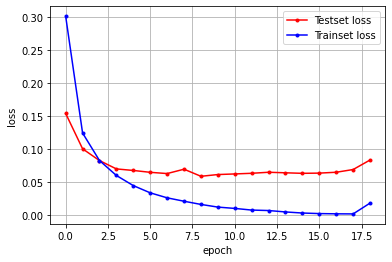

In [58]:
#H. 테스트셋의 오차와 학습셋의 오차를 비교할 수 있는 그래프로 출력합니다


# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')

# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()